### Computational photography - lab 4 - task 1 and 2

###### Filip Gromuł

In [45]:
%pylab inline

from imageio import imread
import matplotlib.pyplot as plt


def apply_homography(source, out, H, bilinear_filtering=False):
    target_shape = out.shape
    source_shape = source.shape
    
    def in_source(x,y):
        return (x >= 0) & (y >= 0) & (x < source_shape[0]-1) & (y < source_shape[1]-1)
    
    def bilinear(x,y):
        (fx, int_x) = math.modf(x)
        (fy, int_y) = math.modf(y)
        f_00 = source[int_x][int_y]
        f_01 = source[int_x][int_y+1]
        f_10 = source[int_x+1][int_y]
        f_11 = source[int_x+1][int_y+1]
        return f_00*(1-fx)*(1-fy) + f_10*fx*(1-fy) + f_01*(1-fx)*fy + f_11*fx*fy
    
    for x in range(target_shape[0]):
        for y in range(target_shape[1]):
            (ty,tx,tw) = H.dot([y,x,1])
            tx = tx / tw
            ty = ty / tw
            if in_source(tx, ty):
                if bilinear_filtering:
                    out[x][y] = bilinear(tx,ty)[:3]
                else:
                    out[x][y] = source[tx][ty][:3]
    return out

Populating the interactive namespace from numpy and matplotlib


/home/kyp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


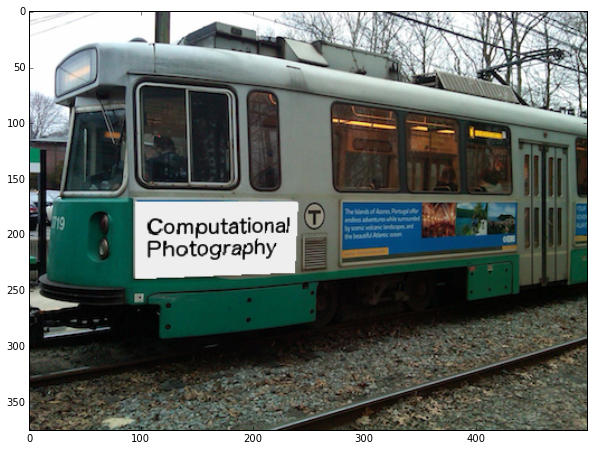

In [47]:
H = array([
        [ 0.8025, 0.0116, -78.2148],
        [ -0.0058, 0.8346, -141.3292],
        [ -0.0006, -0.0002, 1. ]] 
)
orig_H = H

target_image = imread("green.png")
superimposed_image = imread("poster.png")
    
plt.figure(figsize=(10,10))
plt.imshow(apply_homography(superimposed_image, target_image, H, False))

/home/kyp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/kyp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/kyp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/kyp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


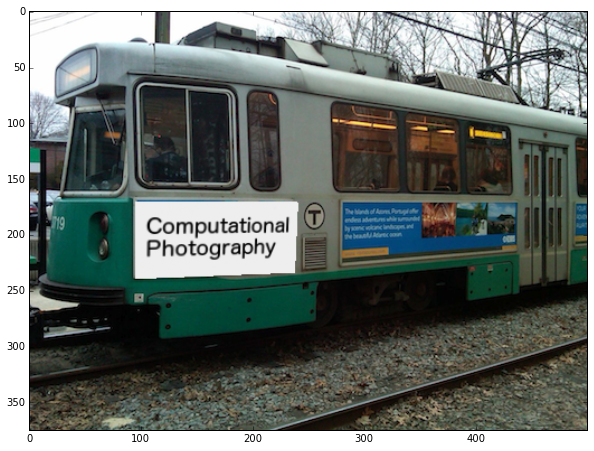

In [48]:
target_image = imread("green.png")
superimposed_image = imread("poster.png")

plt.figure(figsize=(10,10))
plt.imshow(apply_homography(superimposed_image, target_image, H, True))

In [66]:
from numpy import linalg

def homography_from_points(source_pts, target_pts, verbose=False):
    correspondences_count = len(source_pts)
    
    # we have two equations for each point correspondance
    A = zeros((2*correspondences_count, 9))
    for i in range(correspondences_count):
        A[i*2] = [
            -source_pts[i][0], -source_pts[i][1], -1, 
            0, 0, 0, 
            target_pts[i][0]*source_pts[i][0], target_pts[i][0]*source_pts[i][1], target_pts[i][0]
        ]
        A[i*2+1] = [
            0, 0, 0,
            -source_pts[i][0], -source_pts[i][1], -1, 
            target_pts[i][1]*source_pts[i][0], target_pts[i][1]*source_pts[i][1], target_pts[i][1]            
        ]
    
    # compute the SVD decomposition
    U,S,V = linalg.svd(A)
    
    if verbose:
        print ""
        print "A:"
        print A
        print "U:"
        print U
        print "S:"
        print S
        print "V:"
        print V
        print ""
    
    # as the results are sorted with descending sigma, we take the best (last) solution
    H = V[8].reshape((3,3)) 
        
    # normalize the homography
    return H / H[2,2]

In [67]:

target_image = imageio.imread("green.png")
superimposed_image = imageio.imread("poster.png")

h, w, _ = superimposed_image.shape

pointListPoster=[array([0, 0, 1]), array([w, 0, 1]), array([w, h, 1]), array([0, h, 1])]
pointListTrain=[array([95, 170, 1]), array([238,171, 1]), array([235, 233, 1]), array([94, 239,
1])]

np.set_printoptions(precision=4, suppress=True)

print(orig_H)

H = homography_from_points(pointListTrain, pointListPoster, True)

print(H)

print("diff:")
print(np.abs(H-orig_H))

[[   0.8025    0.0116  -78.2148]
 [  -0.0058    0.8346 -141.3292]
 [  -0.0006   -0.0002    1.    ]]

A:
[[   -95.   -170.     -1.      0.      0.      0.      0.      0.      0.]
 [     0.      0.      0.    -95.   -170.     -1.      0.      0.      0.]
 [  -238.   -171.     -1.      0.      0.      0.  34034.  24453.    143.]
 [     0.      0.      0.   -238.   -171.     -1.      0.      0.      0.]
 [  -235.   -233.     -1.      0.      0.      0.  33605.  33319.    143.]
 [     0.      0.      0.   -235.   -233.     -1.  15510.  15378.     66.]
 [   -94.   -239.     -1.      0.      0.      0.      0.      0.      0.]
 [     0.      0.      0.    -94.   -239.     -1.   6204.  15774.     66.]]
U:
[[ 0.      0.0002  0.1471  0.5575  0.0542 -0.2293 -0.0968 -0.7763]
 [ 0.     -0.0005 -0.3657  0.2023  0.6018 -0.0316 -0.6472  0.208 ]
 [ 0.6083  0.5545 -0.0598 -0.0205  0.3781 -0.1617  0.3865  0.0001]
 [ 0.     -0.0007 -0.5659  0.3201 -0.4348 -0.5609  0.121   0.2429]
 [ 0.6916 -0.1873  0.347

/home/kyp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/kyp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/kyp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/kyp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


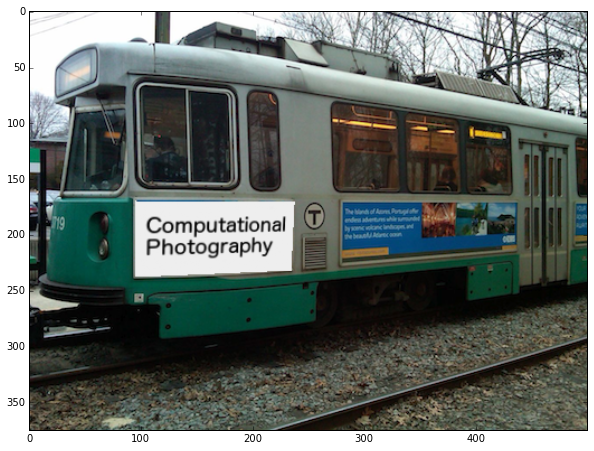

In [39]:
plt.figure(figsize=(10,10))
plt.imshow(apply_homography(superimposed_image, target_image, H, True))

/home/kyp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/kyp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/kyp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/kyp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


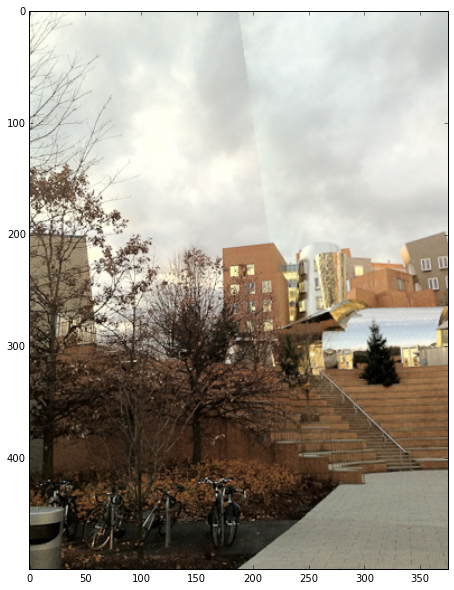

In [71]:
im1=imread("pano/stata-1.png")
im2=imread("pano/stata-2.png")

pointList1=[array([218, 209, 1]), array([300,425, 1]), array([337, 209, 1]), array([336, 396,
1])]
pointList2=[array([4, 232, 1]), array([62, 465, 1]), array([125, 247, 1]), array([102, 433, 1])]

H = homography_from_points(pointList1, pointList2)

plt.figure(figsize=(10,10))
plt.imshow(apply_homography(im2, im1, H, True))

/home/kyp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/kyp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


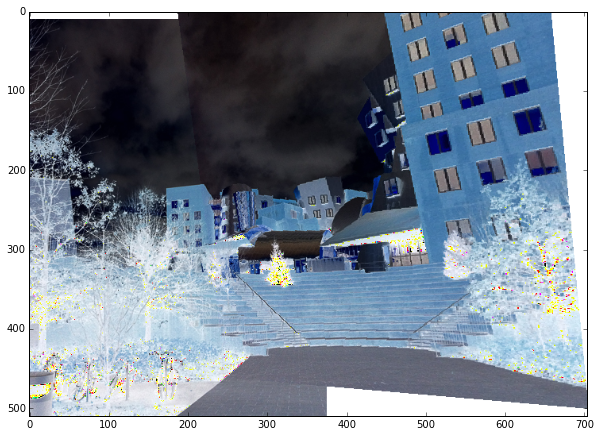

In [103]:
im1=imread("pano/stata-1.png")
im2=imread("pano/stata-2.png")

h, w, _ = im2.shape
H_inv = linalg.inv(H)

minpts = H_inv.dot([0,0,1])
maxpts = H_inv.dot([w,h,1])
maxpts = maxpts / maxpts[2]
minpts = minpts / minpts[2]

h_orig, w_orig, _ = im1.shape

x_offset = abs(min(0, minpts[0]))
y_offset = abs(min(0, minpts[1]))

new_width = max(w_orig, maxpts[0]) + x_offset
new_height = max(h_orig, maxpts[1]) + y_offset

new_image = ones((new_height, new_width, 3))

for x in range(w_orig):
    for y in range(h_orig):
        new_image[y+y_offset][x+x_offset] = im1[y][x]
        
translation_mat = [
    [1, 0, x_offset],
    [0, 1, y_offset],
    [0, 0, 1]
]
H_inv_new = H_inv.dot(translation_mat)
H_new = linalg.inv(H_inv_new)

plt.figure(figsize=(10,10))
plt.imshow(apply_homography(im2, new_image, H_new))